In [1]:
import pandas as pd
posts = pd.read_csv('posts_clean.csv.gz', compression='gzip')
print('Postagens: %i' %len(posts))

Postagens: 1346858


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from __future__ import unicode_literals
import codecs
with codecs.open('LIWC2007_Portugues_win.dic', encoding='latin1') as fp:
        liwc = fp.readlines()
print('LIWC: %i' %len(liwc))

LIWC: 127161


### build dictionary

In [6]:
iam = set()
past = set()
present = set()
future = set()
social = set()
family = set()
friend = set()
posemo = set()
negemo = set()
cogmech = set()
insight = set()
cause = set()
discrep = set()
percept = set()
feel = set()
for line in liwc:
    line = line.strip()
    if line:
        line = line.split()
        word = line[0]
        cat = line[1:]
        if '4' in cat:
            iam.add(word)
        elif '13' in cat:
            past.add(word)
        elif '14' in cat:
            present.add(word)
        elif '15' in cat:
            future.add(word)
        elif '121' in cat:
            social.add(word)
        elif '122' in cat:
            family.add(word)
        elif '123' in cat:
            friend.add(word)
        elif '126' in cat:
            posemo.add(word)
        elif '127' in cat:
            negemo.add(word)
        elif '131' in cat:
            cogmech.add(word)
        elif '132' in cat:
            insight.add(word)
        elif '133' in cat:
            cause.add(word)
        elif '134' in cat:
            discrep.add(word)
        elif '140' in cat:
            percept.add(word)
        elif '143' in cat:
            feel.add(word)

### split data

In [7]:
posts = posts.fillna('')
postsReflexivos = posts[posts['content'].str.contains("eu sinto|eu penso|eu acredito")]
print('Posts Reflexivos: %i' %len(postsReflexivos))

Posts Reflexivos: 13881


In [10]:
def iamCheck(x): 
    try:
        count = 0
        text = x['content'].split()
        for token in text:
            if token in pos:
                count += 1
        return count
    except:
        return 0

postsReflexivos['iam'] = posts.apply(iamCheck,axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


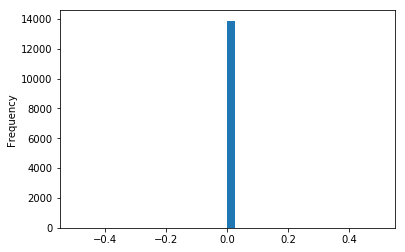

In [11]:
%matplotlib inline
postsReflexivos['iam'].plot.hist(bins=40)